# Runna ML Engineer Takehome Task

--------------------------------------------------------------------------------

### Create a model that predicts the ability of a runner from their completed running training plan data
create model using the data in `data_labelled.json`, and then using this model, provide predictions for the unlabelled data in `data_unlabelled.json`.

--------------------------------------------------------------------------------

## Dataset

#### Files:
There are 3 files provided:
- `data_labelled.json` -> this is provided for you to use to create your model
- `data_unlabelled.json` -> you must provide predictions for this unlabelled data
- `example_predictions.txt` -> an example for how the predictions should be provided

#### Explanation for the data:
- The total weekly mileage completed by the runner each week throughout the course of their training plan (km)
- The mileage of the long run completed in each week of the training plan (km)
- How many runs they did in each week (same for all weeks)
- The race distance they trained for (km)

### LABELLED DATA - the labelled data (data_labelled.json) available to create the model is comprised of:
- Records where each record contains the data for 1 runner's completed training plan, along with their ability

#### There are five possible abilities:
- `BEGINNER`
- `INTERMEDIATE`
- `ADVANCED`
- `ELITE`
- `ELITE_PLUS`


- Note: these are ordered, i.e. `BEGINNER` < `INTERMEDIATE` < `ADVANCED` < `ELITE` < `ELITE_PLUS`

#### Each record in 'data_labelled.json' is a data point representing a unique runner who's completed a training plan
#### E.g.
```{'ability': 'ELITE', 'runs_per_week': 2, 'n_weeks': 11, 'race_distance': 21.1, 'total_weekly_mileages': [21.9, 24.4, 26.9, 30.0, 32.4, 36.9, 38.9, 40.3, 40.6, 39.9, 42.3], 'long_run_mileages': [13.0, 13.9, 14.6, 15.8, 16.8, 18.4, 18.8, 21.2, 22.6, 23.9, 22.0]}```

#### Shows the data for:
- `ability` -> An `ELITE` runner
- `runs_per_week` -> They've completed `2` runs in each week
- `n_weeks` -> They've followed an `11` week plan (note there are 11 values for `total_weekly_mileages` and `long_run_mileages`)
- `race_distance` -> They've trained for a `21.1`km race (half marathon)
- `total_weekly_mileages` -> Has run a total of `21.9`km in week 1, `24.4`km in week 2, and so on
- `long_run_mileages` -> Has completed a longest run of `13`km in week 1, `13.9`km in week 2, and so on

##### Example:

### UNLABELLED DATA - the data to provide predictions for (data_unlabelled.json)
- The structure of this file is identical, however without the 'ability' field

In [45]:
# The data can be loaded in like this:

import json
with open('data_unlabelled.json', 'r') as in_file:
    data_unlabelled = json.load(in_file)
print("Example record:\n", data_unlabelled[0])

# It could be loaded into a dataframe like this:

import pandas as pd
df_unlabelled = pd.DataFrame(data_unlabelled)
print("\nUnlabelled data:\nNote: Identical structure to data_labelled except without the 'ability' column - this is to be predicted")
df_unlabelled.head()

Example record:
 {'runs_per_week': 4, 'n_weeks': 12, 'race_distance': 16.0, 'total_weekly_mileages': [32.1, 36.1, 39.8, 42.6, 45.8, 50.9, 52.7, 57.4, 60.8, 66.9, 68.2, 75.2], 'long_run_mileages': [11.5, 12.0, 12.9, 13.7, 14.1, 15.4, 16.7, 17.0, 17.8, 18.8, 20.4, 21.4]}

Unlabelled data:
Note: Identical structure to data_labelled except without the 'ability' column - this is to be predicted


,runs_per_week,n_weeks,race_distance,total_weekly_mileages,long_run_mileages
0,4,12,16.0,"[32.1, 36.1, 39.8, 42.6, 45.8, 50.9, 52.7, 57....","[11.5, 12.0, 12.9, 13.7, 14.1, 15.4, 16.7, 17...."
1,5,12,5.0,"[23.1, 26.0, 29.9, 32.9, 36.1, 38.9, 42.4, 43....","[5.8, 6.3, 7.1, 7.8, 8.8, 9.6, 10.4, 10.9, 11...."
2,4,10,5.0,"[13.7, 16.1, 18.5, 20.3, 23.0, 26.5, 29.4, 32....","[4.8, 5.7, 6.2, 7.0, 7.6, 8.3, 9.0, 9.3, 10.8,..."
3,7,21,21.1,"[61.1, 68.2, 70.6, 73.0, 79.4, 85.0, 89.3, 92....","[13.6, 14.7, 14.2, 14.5, 14.8, 15.9, 15.1, 15...."
4,7,21,21.1,"[63.1, 67.6, 69.9, 75.0, 83.1, 84.6, 87.3, 93....","[14.1, 14.9, 15.3, 15.6, 14.9, 16.1, 16.0, 15...."


--------------------------------------------------------------------------------

## Background

### Intro to weekly mileage
- Total weekly mileage in running training is the amount of distance a runner runs in a week. It's an important factor for runners to keep track of because it helps measure progress, build  endurance and improve overall fitness level. Whether someone is new to running or has been running for years, keeping track of their total weekly mileage can help them set goals and challenge themselves to increase their distance over time, leading to improved health and fitness.
- Hence, the total weekly mileage is the sum of the mileage of each workout completed during a week of training.
- E.g. If a runner completed 3 runs in a week, which comprise of a long run of 15km, and two other runs each of 5km, they would have a total weekly mileage of 15km + 5km + 5km = 25km
- On average, the total weekly mileage will grow gradually each week

### Intro to long runs
- There are many different types of running workout, here we provide just the mileage of the long run
- The long run is the longest run a runner completes in a week, and grows week on week
- Long runs in running training refer to workouts where a runner covers a longer distance than they typically do in their regular runs, usually taking place on weekends. They are important for building endurance, mental toughness and improving running efficiency. By challenging the body to maintain a sustained effort for an extended period of time, long runs help runners develop their ability to run longer distances and tackle more challenging races.
- Their primary benefit is to build endurance
- In all the plans here, there is one 'long run' in each week
- On average, the long run mileage will grow gradually each week

### Relationship between total weekly mileage and long run mileage
Taking the same example data:

```{'ability': 'ELITE', 'runs_per_week': 2, 'n_weeks': 11, 'race_distance': 21.1, 'total_weekly_mileages': [21.9, 24.4, 26.9, 30.0, 32.4, 36.9, 38.9, 40.3, 40.6, 39.9, 42.3], 'long_run_mileages': [13.0, 13.9, 14.6, 15.8, 16.8, 18.4, 18.8, 21.2, 22.6, 23.9, 22.0]}```

It can be seen that the runner has completed `2` runs in every week. The long run is included in this. 

There for in the 5th week of the plan, the runner completed `2` runs, totalling `32.4`km, of which `16.8`km was the long run, and `15.6`km was 1 other run

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

In [46]:
import numpy as np
from pandas.api.types import CategoricalDtype
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel, OrderedResultsWrapper
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import scipy.stats as stats
from typing import NamedTuple, List
import seaborn as sns

In [58]:
def pre_processing(df:pd.DataFrame) -> pd.DataFrame:
    """Preprocess the raw dataframe and feature engineering- 
        adding difference cols for long_run_mileages and total_weekly_mileages
    :params df: DataFrame of the input raw file """
    
    df_reshaped = df.explode(['total_weekly_mileages','long_run_mileages'])
    df_reshaped['week_number'] = df_reshaped.index.to_series().groupby(level=0).cumcount()
    df_reshaped['weeks_ago']= df_reshaped['n_weeks']-df_reshaped['week_number']

    # # making new features by shifting "long_run_mileages" and "total_weekly_mileages" by 1

    df_reshaped['difference_long_run_mileages'] = df_reshaped['long_run_mileages'] - df_reshaped['long_run_mileages'].shift(1)
    df_reshaped['difference_total_weekly_mileages'] = df_reshaped['total_weekly_mileages'] - df_reshaped['total_weekly_mileages'].shift(1)
    df_reshaped = df_reshaped[['total_weekly_mileages','long_run_mileages','weeks_ago','difference_long_run_mileages','difference_total_weekly_mileages']].pivot_table(index=df_reshaped.index, columns=['weeks_ago'])

    # imputing nans by filling forward
    df_reshaped = df_reshaped.fillna(axis=1, method = 'ffill')

    df_reshaped.columns = [f'{feature}_{week}' for feature, week in df_reshaped.columns.to_flat_index()]
    df_reshaped = pd.concat([df, df_reshaped], axis=1)
    df_reshaped.drop(columns = ['total_weekly_mileages','long_run_mileages'],inplace=True)
    return df_reshaped

Applying "pre-processing" function written above on the labelled dataset. 
1- Preprocessing
2- Feature engineering : New features which are the differences shifted by 1 for long_run_mileages and total_weekly_mileages. We do remove "total_weekly_mileages" and "long_run_mileages" columns later on.
3- Imputation: Fill forward



In [48]:
df_labelled_reshaped = pre_processing(df_labelled)
df_labelled_reshaped.head()
df_labelled_reshaped.shape

(249, 88)

Treatung the categorical columns which is the target, also checking how balance is the dataset. It is unbalanced but not "too" unbalanced.

In [49]:
categories=['BEGINNER', 'INTERMEDIATE', 'ADVANCED', 'ELITE', 'ELITE_PLUS']
cat_type = CategoricalDtype(categories=['BEGINNER', 'INTERMEDIATE', 'ADVANCED', 'ELITE', 'ELITE_PLUS'], ordered=True)

df_labelled_reshaped["ability"] = df_labelled_reshaped["ability"].astype(cat_type)
df_labelled_reshaped['ability'].dtype

print(df_labelled_reshaped['ability'].value_counts(dropna=False))


ELITE           75
ADVANCED        62
BEGINNER        50
ELITE_PLUS      37
INTERMEDIATE    25
Name: ability, dtype: int64


This is a multiclass ordinal classification problem.
Below we standardize all features, remove "long_run_mileages_", "total_weekly_mileages_" as we have the differences.
create features matrix X, target matrix y.

In [50]:
df_model = df_labelled_reshaped.copy()
df_model['target'] = df_model['ability']
df_model.drop(columns = 'ability', inplace = True)
n_weeks = df_model['n_weeks'].max()

# remove unwanted features
df_model.drop(columns = [f'long_run_mileages_{n}' for n in range(2, n_weeks+1)], inplace = True)
df_model.drop(columns = [f'total_weekly_mileages_{n}' for n in range(2, n_weeks+1)], inplace = True)


X = df_model.drop(['target'], axis=1)

# Standrization
X= (X-X.mean()) / X.std()
y = df_model['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


I use ordinal regression to model the multiclass ordinal classification, using statsmodels package.
ordered logistic regression model and Ordered probit regression.
 
In addition to 'logit' and 'probit' regression, any continuous distribution from 'SciPy.stats' package can be used for the distr argument. Third model is using 'cloglog' distribution as classes are not completely balanced and this distribution may help.

In [51]:
class ModelFoldResults(NamedTuple):
    actual: np.array
    preds: np.array
    accuracy: float
    precision: float
    recall: float
    f1: float
    fitted_model: OrderedResultsWrapper

    @staticmethod
    def create_from_predictions(actual: np.ndarray, preds: np.ndarray, fitted_model: OrderedResultsWrapper) -> "ModelResult":
        """Returns metrics for classification accuracy, precision, recall and f1
        :param actual: Numpy array of actual y values
        :param preds: Numpy array of predicted y values
        :return: OrderedResultsWrapper
        """
        print(type(preds))
        print(type(fitted_model))
        print(actual)
        print(preds)
        accuracy = metrics.accuracy_score(actual, preds)
        print(f'{accuracy=}')

        precision = precision_score(actual, preds, average='weighted')
        recall = recall_score(actual, preds, average='weighted')
        f1 = f1_score(actual, preds, average='weighted')

        return ModelFoldResults(actual, preds, accuracy, precision, recall, f1, fitted_model)

class ModelResult(NamedTuple):
    distr: str
    results: List[ModelFoldResults]
    mean_accuracy: float
    mean_precision: float
    mean_recall: float
    mean_f1: float

    
    @staticmethod
    def create_from_results(distr: str, results: np.ndarray) -> "ModelResult":
        """Returns the mean for all metrics calculated per fold
        :param distr: str distribution for statsmodel 
        :param results: 
        :return: ModelResult
        """

        mean_accuracy = np.mean([r.accuracy for r in results])
        mean_precision = np.mean([r.precision for r in results])
        mean_recall = np.mean([r.recall for r in results])
        mean_f1 = np.mean([r.f1 for r in results])
        return ModelResult(distr, results, 
                           mean_accuracy, mean_precision, mean_recall, mean_f1)

    
#  Important- in function below Kfold validation is applied, statsmodels does not have kfold validation
# and sklearn kfold is not compatable with statsmodels hence I decided to just write it.

def run_model(X: pd.DataFrame, y: pd.DataFrame, distr: str, n_folds: int) -> ModelFoldResults:
    """Runs models with n_fold cross validation 
    :param X: Dataframe of features
    :param y: Dataframe of target values
    :param distr: distribution inputed in to statsmodel
    :param n_folds: integer number of folds
    :return:"""
    fold_size = len(X) / n_folds
    all_row_idx = X.index.to_frame().reset_index(drop=True)
    all_row_idx['fold'] = (all_row_idx.index // fold_size).astype('int')
    all_row_idx.set_index('fold', inplace=True)
    all_row_idx = all_row_idx[0]
    pd.DataFrame
    model_fold_results = []
    models_trained = []
    for fold in range(n_folds):
        train_folds = pd.concat([all_row_idx.loc[0:fold-1], all_row_idx.loc[fold+1:]])
        test_fold = all_row_idx.loc[fold]

        print('Fold ', fold)

        X_train = X.loc[train_folds]
        y_train = y.loc[train_folds]
        X_test = X.loc[test_fold]
        y_test = y.loc[test_fold]
        
        # Create model with distribution to fit
        mod = OrderedModel(y, X, distr=distr)

        # Find parameters that best fit the training data
        fitted_model = mod.fit(method='bfgs')

        # Predict the test data from the observed data
        predicted = fitted_model.model.predict(fitted_model.params, np.array(X_test)[:, None])
        preds = predicted.squeeze(axis=1).argmax(axis=1)
        model_fold_results.append(
            ModelFoldResults.create_from_predictions(y_test.cat.codes.to_numpy(), preds, fitted_model))
        
    return ModelResult.create_from_results(distr=distr, results=model_fold_results)
    
class CLogLog(stats.rv_continuous):
    def _ppf(self, q):
        return np.log(-np.log(1 - q))

    def _cdf(self, x):
        return 1 - np.exp(-np.exp(x))


All 3 models are ran and validated using 5 folds 
using classes and functions implimented above.
metrics for every model is printed.



In [52]:
# run_model(X_train, y_train, 'probit', 5)
models = {
    distr: run_model(X, y, distr, 5)
    for distr in ('probit', 'logit')
}
models['cloglog'] = run_model(X, y, CLogLog(), 5)

Fold  0
Optimization terminated successfully.
         Current function value: 0.453719
         Iterations: 122
         Function evaluations: 126
         Gradient evaluations: 126
<class 'numpy.ndarray'>
<class 'statsmodels.miscmodels.ordinal_model.OrderedResultsWrapper'>
[1 0 3 0 0 3 3 2 0 3 1 4 3 2 4 0 3 2 3 3 1 4 0 2 4 3 3 3 3 0 4 2 4 3 3 0 3
 1 3 2 1 1 4 4 2 3 3 4 2 3]
[1 0 3 0 0 3 3 2 0 3 1 4 3 2 4 0 3 2 3 3 2 4 0 2 3 3 3 3 3 0 4 1 4 3 3 0 4
 2 2 2 1 1 4 4 2 3 3 4 3 3]
accuracy=0.86
Fold  1
Optimization terminated successfully.
         Current function value: 0.453719
         Iterations: 122
         Function evaluations: 126
         Gradient evaluations: 126
<class 'numpy.ndarray'>
<class 'statsmodels.miscmodels.ordinal_model.OrderedResultsWrapper'>
[3 4 2 3 3 0 1 2 2 4 3 3 2 3 2 4 0 0 0 0 0 3 3 4 2 1 2 2 1 4 2 0 0 0 1 2 4
 0 3 1 3 0 2 2 4 2 2 1 2 3]
[3 4 2 3 3 0 1 2 2 4 3 3 2 4 2 3 0 0 0 2 0 3 3 3 2 1 2 2 1 4 2 1 0 0 0 2 4
 0 3 1 3 0 2 3 3 1 2 2 2 3]
accuracy=0.8
Fold  2
O

probit: model.mean_accuracy=0.8191836734693878
probit: model.mean_f1=0.8185633890526262
Confusion matrix:
[[47  4  0  0  0]
 [ 2 17  5  0  0]
 [ 1  4 50  5  0]
 [ 0  0  7 63 10]
 [ 0  0  0  7 27]]
logit: model.mean_accuracy=0.8351836734693878
logit: model.mean_f1=0.8339367955979092
Confusion matrix:
[[47  4  0  0  0]
 [ 2 18  4  0  0]
 [ 1  3 51  5  0]
 [ 0  0  7 64  9]
 [ 0  0  0  6 28]]
cloglog: model.mean_accuracy=0.839265306122449
cloglog: model.mean_f1=0.8396057774333368
Confusion matrix:
[[46  2  0  0  0]
 [ 3 17  4  0  0]
 [ 1  6 51  4  0]
 [ 0  0  6 65  7]
 [ 0  0  1  6 30]]


<Axes: >

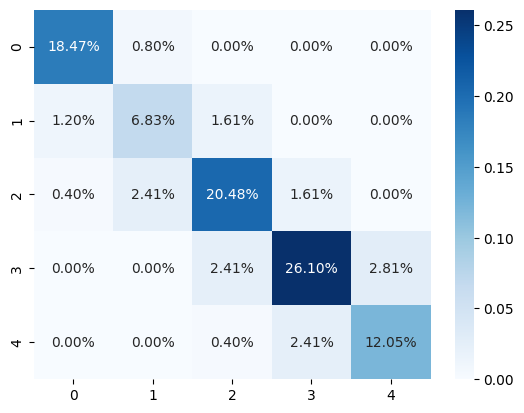

In [53]:
for distr, model in models.items():
    print(f'{distr}: {model.mean_accuracy=}')
    print(f'{distr}: {model.mean_f1=}')
    print('Confusion matrix:')
    cf_matrix = np.sum([confusion_matrix(f.preds, f.actual) for f in model.results], axis=0)
    print(np.sum([confusion_matrix(f.preds, f.actual) for f in model.results], axis=0))
    
# plotting heatmap
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [54]:
best_model_name = list(models.keys())[np.argmax([x.mean_f1 for x in models.values()])]
best_model_distr = models[best_model_name].distr
best_model_name, best_model_distr

('cloglog', <__main__.CLogLog at 0x7fc7ec8513c0>)

In [60]:
X_unlabelled = pre_processing(df_unlabelled)
X_unlabelled= (X_unlabelled-X_unlabelled.mean()) / X_unlabelled.std()
X_unlabelled.drop(columns = [f'long_run_mileages_{n}' for n in range(2, n_weeks+1)], inplace = True)
X_unlabelled.drop(columns = [f'total_weekly_mileages_{n}' for n in range(2, n_weeks+1)], inplace = True)

Fit entire labelled data to model; predict on entire data set

In [61]:
mod = OrderedModel(y, X, distr=best_model_distr)
fitted_model = mod.fit(method='bfgs')
predicted = fitted_model.model.predict(fitted_model.params, np.array(X_unlabelled)[:, None])
preds = predicted.squeeze(axis=1).argmax(axis=1)
preds

Optimization terminated successfully.
         Current function value: 0.422229
         Iterations: 161
         Function evaluations: 163
         Gradient evaluations: 163


array([2, 2, 2, 3, 4, 1, 2, 1, 1, 3, 4, 4, 2, 2, 1, 0, 4, 4, 2, 2, 0, 0,
       1, 2, 2, 4, 4, 0, 1, 0, 2, 4, 4, 3, 2, 3, 0, 4, 2, 2, 2, 1, 4, 2,
       2, 1, 2, 3, 3, 3, 2, 1, 0, 0, 2, 4, 4, 3, 4, 1, 2, 0, 4, 3, 4, 4,
       3, 3, 2, 2, 3, 0, 3, 1, 4, 2, 1, 0, 3, 4, 3, 2, 3, 1, 3, 1, 0, 0,
       2, 3, 0, 0, 3, 0, 0, 3, 3, 3, 4, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3, 1,
       4, 2, 4, 4, 4, 2, 2, 3, 1, 1, 0, 2, 1, 3, 1])

In [62]:
with open('my_preds.txt', 'w') as f:
    for x in preds:
        print(cat_type.categories[x], file=f)